# Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import sys
sys.path.append('D:\\Abhishek\\VS Code Projects\\Loan Approval Prediction\\Loan-Approval-Prediction-')
sys.path

['D:\\Abhishek\\VS Code Projects\\Loan Approval Prediction\\Loan-Approval-Prediction-',
 'C:\\Users\\Abhishek\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'C:\\Users\\Abhishek\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'C:\\Users\\Abhishek\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'C:\\Users\\Abhishek\\AppData\\Local\\Programs\\Python\\Python312',
 'D:\\Abhishek\\VS Code Projects\\Loan Approval Prediction\\Loan-Approval-Prediction-\\venv',
 '',
 'D:\\Abhishek\\VS Code Projects\\Loan Approval Prediction\\Loan-Approval-Prediction-\\venv\\Lib\\site-packages',
 'D:\\Abhishek\\VS Code Projects\\Loan Approval Prediction\\Loan-Approval-Prediction-\\venv\\Lib\\site-packages\\win32',
 'D:\\Abhishek\\VS Code Projects\\Loan Approval Prediction\\Loan-Approval-Prediction-\\venv\\Lib\\site-packages\\win32\\lib',
 'D:\\Abhishek\\VS Code Projects\\Loan Approval Prediction\\Loan-Approval-Prediction-\\venv\\Lib\\site-packages\\Pythonwin',
 'D:\\Abhishek\\VS Code P

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
class LoanApprovalProperties:
    train_path = '../data/train.csv'
    test_path = '../data/test.csv'
    cross_validation_folds = 3
    classifiers = []
    columns_considered = ['person_age','person_home_ownership','loan_grade','cb_person_default_on_file','person_emp_length','person_income','loan_int_rate','loan_percent_income','loan_amnt']
    column_target = 'loan_status'
    
config = LoanApprovalProperties


In [6]:
trainSet = pd.read_csv(config.train_path)
testSet = pd.read_csv(config.test_path)

In [7]:
trainSet.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [9]:
object_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

# Preprocessing

We need to convert text data into numerical data. Since most of the fields are categorical in nature OneHotEncoder is best suited for the needs.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
cat_pipeline = make_pipeline(OneHotEncoder())

In [11]:
from scripts.Helper import ratio, ratio_column_name, percent_to_ratio, percent_to_ratio_column_name, array_transformer, array_transformer_column_names

In [12]:
ratio_transformer = FunctionTransformer(ratio, feature_names_out=ratio_column_name)

In [13]:
percent_transformer = FunctionTransformer(percent_to_ratio, feature_names_out=percent_to_ratio_column_name)

In [14]:
array_transformer = FunctionTransformer(array_transformer, feature_names_out=array_transformer_column_names)

In [15]:
num_pipeline = make_pipeline(ratio_transformer)

In [16]:
percent_pipeline = make_pipeline(percent_transformer)

In [17]:
array_pipeline = make_pipeline(array_transformer)

In [18]:
from sklearn.compose import make_column_transformer, make_column_selector
preProcessingTransformer = make_column_transformer((cat_pipeline, make_column_selector(dtype_include=object))
                                                   ,(num_pipeline,['person_emp_length','person_age'])
                                                   #,(num_pipeline,['cb_person_cred_hist_length','person_age'])
                                                   ,(percent_pipeline, ['loan_int_rate'])
                                                   #,(num_pipeline,['cb_person_cred_hist_length','person_emp_length'])
                                                   ,(num_pipeline, ['person_age','person_income'])
                                                   ,(num_pipeline, ['person_age','loan_amnt'])
                                                   ,(array_pipeline, ['loan_percent_income'])
                                                  )
preprocessedArray = preProcessingTransformer.fit_transform(trainSet)
preProcessingTransformer.get_feature_names_out()
train = pd.DataFrame(preprocessedArray, columns=preProcessingTransformer.get_feature_names_out())

In [19]:
preProcessingTransformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029E78D57830>),
                                ('pipeline-2',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_column_name at 0x0000029E78FEC400>,
                                                                      func=<function ratio at 0x0000...
                                                  FunctionTransformer(feature_names_out=<function ratio_column_name at 0x0000029E78FEC400>,
                                                                      func=<function ratio at 0x0000029E78FEC220>))]),
                                 ['person_age', 'loan_amnt']),
                                ('pipeline-6',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function array_transformer_column_names at 0x0000029E78FEC860>,
                                                                      func=<function array_transformer at 0x0000029E78FEC7C0>))]),
                                 ['loan_percent_income'])])

In [20]:
train.sample(20)

,pipeline-1__person_home_ownership_MORTGAGE,pipeline-1__person_home_ownership_OTHER,pipeline-1__person_home_ownership_OWN,pipeline-1__person_home_ownership_RENT,pipeline-1__loan_intent_DEBTCONSOLIDATION,pipeline-1__loan_intent_EDUCATION,pipeline-1__loan_intent_HOMEIMPROVEMENT,pipeline-1__loan_intent_MEDICAL,pipeline-1__loan_intent_PERSONAL,pipeline-1__loan_intent_VENTURE,...,pipeline-1__loan_grade_E,pipeline-1__loan_grade_F,pipeline-1__loan_grade_G,pipeline-1__cb_person_default_on_file_N,pipeline-1__cb_person_default_on_file_Y,pipeline-2__person_emp_length_to_person_age_ratio,pipeline-3__loan_int_rate_ratio,pipeline-4__person_age_to_person_income_ratio,pipeline-5__person_age_to_loan_amnt_ratio,pipeline-6__loan_percent_income
52473,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.115385,0.0932,0.000473,0.002600,0.18
25762,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.090909,0.1299,0.000344,0.002750,0.13
25655,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.466667,0.1037,0.000789,0.003000,0.26
36703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.227273,0.1484,0.000512,0.002444,0.21
46587,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.178571,0.1114,0.000389,0.002800,0.14
55086,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.0849,0.000643,0.008308,0.08
15977,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.095238,0.1380,0.000323,0.003500,0.09
56721,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.0749,0.000453,0.008000,0.06
35945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.1349,0.000568,0.001429,0.40
34026,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.096774,0.0699,0.000217,0.003100,0.07


In [21]:
train.describe()

,pipeline-1__person_home_ownership_MORTGAGE,pipeline-1__person_home_ownership_OTHER,pipeline-1__person_home_ownership_OWN,pipeline-1__person_home_ownership_RENT,pipeline-1__loan_intent_DEBTCONSOLIDATION,pipeline-1__loan_intent_EDUCATION,pipeline-1__loan_intent_HOMEIMPROVEMENT,pipeline-1__loan_intent_MEDICAL,pipeline-1__loan_intent_PERSONAL,pipeline-1__loan_intent_VENTURE,...,pipeline-1__loan_grade_E,pipeline-1__loan_grade_F,pipeline-1__loan_grade_G,pipeline-1__cb_person_default_on_file_N,pipeline-1__cb_person_default_on_file_Y,pipeline-2__person_emp_length_to_person_age_ratio,pipeline-3__loan_int_rate_ratio,pipeline-4__person_age_to_person_income_ratio,pipeline-5__person_age_to_loan_amnt_ratio,pipeline-6__loan_percent_income
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,0.423293,0.001518,0.053508,0.521681,0.155734,0.209242,0.107085,0.186444,0.170790,0.170705,...,0.017205,0.002541,0.000563,0.851616,0.148384,0.173368,0.106779,0.000527,0.004504,0.159238
std,0.494085,0.038927,0.225047,0.499534,0.362606,0.406771,0.309224,0.389468,0.376329,0.376254,...,0.130036,0.050342,0.023715,0.355484,0.355484,0.137427,0.030347,0.000273,0.003922,0.091692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054200,0.000012,0.000600,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.064516,0.078800,0.000344,0.002200,0.090000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.142857,0.107500,0.000467,0.003333,0.140000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.272727,0.129900,0.000643,0.005333,0.210000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.857143,0.232200,0.005952,0.054000,0.830000


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   pipeline-1__person_home_ownership_MORTGAGE         58645 non-null  float64
 1   pipeline-1__person_home_ownership_OTHER            58645 non-null  float64
 2   pipeline-1__person_home_ownership_OWN              58645 non-null  float64
 3   pipeline-1__person_home_ownership_RENT             58645 non-null  float64
 4   pipeline-1__loan_intent_DEBTCONSOLIDATION          58645 non-null  float64
 5   pipeline-1__loan_intent_EDUCATION                  58645 non-null  float64
 6   pipeline-1__loan_intent_HOMEIMPROVEMENT            58645 non-null  float64
 7   pipeline-1__loan_intent_MEDICAL                    58645 non-null  float64
 8   pipeline-1__loan_intent_PERSONAL                   58645 non-null  float64
 9   pipeli

array([[<Axes: title={'center': 'pipeline-1__person_home_ownership_MORTGAGE'}>,
        <Axes: title={'center': 'pipeline-1__person_home_ownership_OTHER'}>,
        <Axes: title={'center': 'pipeline-1__person_home_ownership_OWN'}>,
        <Axes: title={'center': 'pipeline-1__person_home_ownership_RENT'}>,
        <Axes: title={'center': 'pipeline-1__loan_intent_DEBTCONSOLIDATION'}>],
       [<Axes: title={'center': 'pipeline-1__loan_intent_EDUCATION'}>,
        <Axes: title={'center': 'pipeline-1__loan_intent_HOMEIMPROVEMENT'}>,
        <Axes: title={'center': 'pipeline-1__loan_intent_MEDICAL'}>,
        <Axes: title={'center': 'pipeline-1__loan_intent_PERSONAL'}>,
        <Axes: title={'center': 'pipeline-1__loan_intent_VENTURE'}>],
       [<Axes: title={'center': 'pipeline-1__loan_grade_A'}>,
        <Axes: title={'center': 'pipeline-1__loan_grade_B'}>,
        <Axes: title={'center': 'pipeline-1__loan_grade_C'}>,
        <Axes: title={'center': 'pipeline-1__loan_grade_D'}>,
       

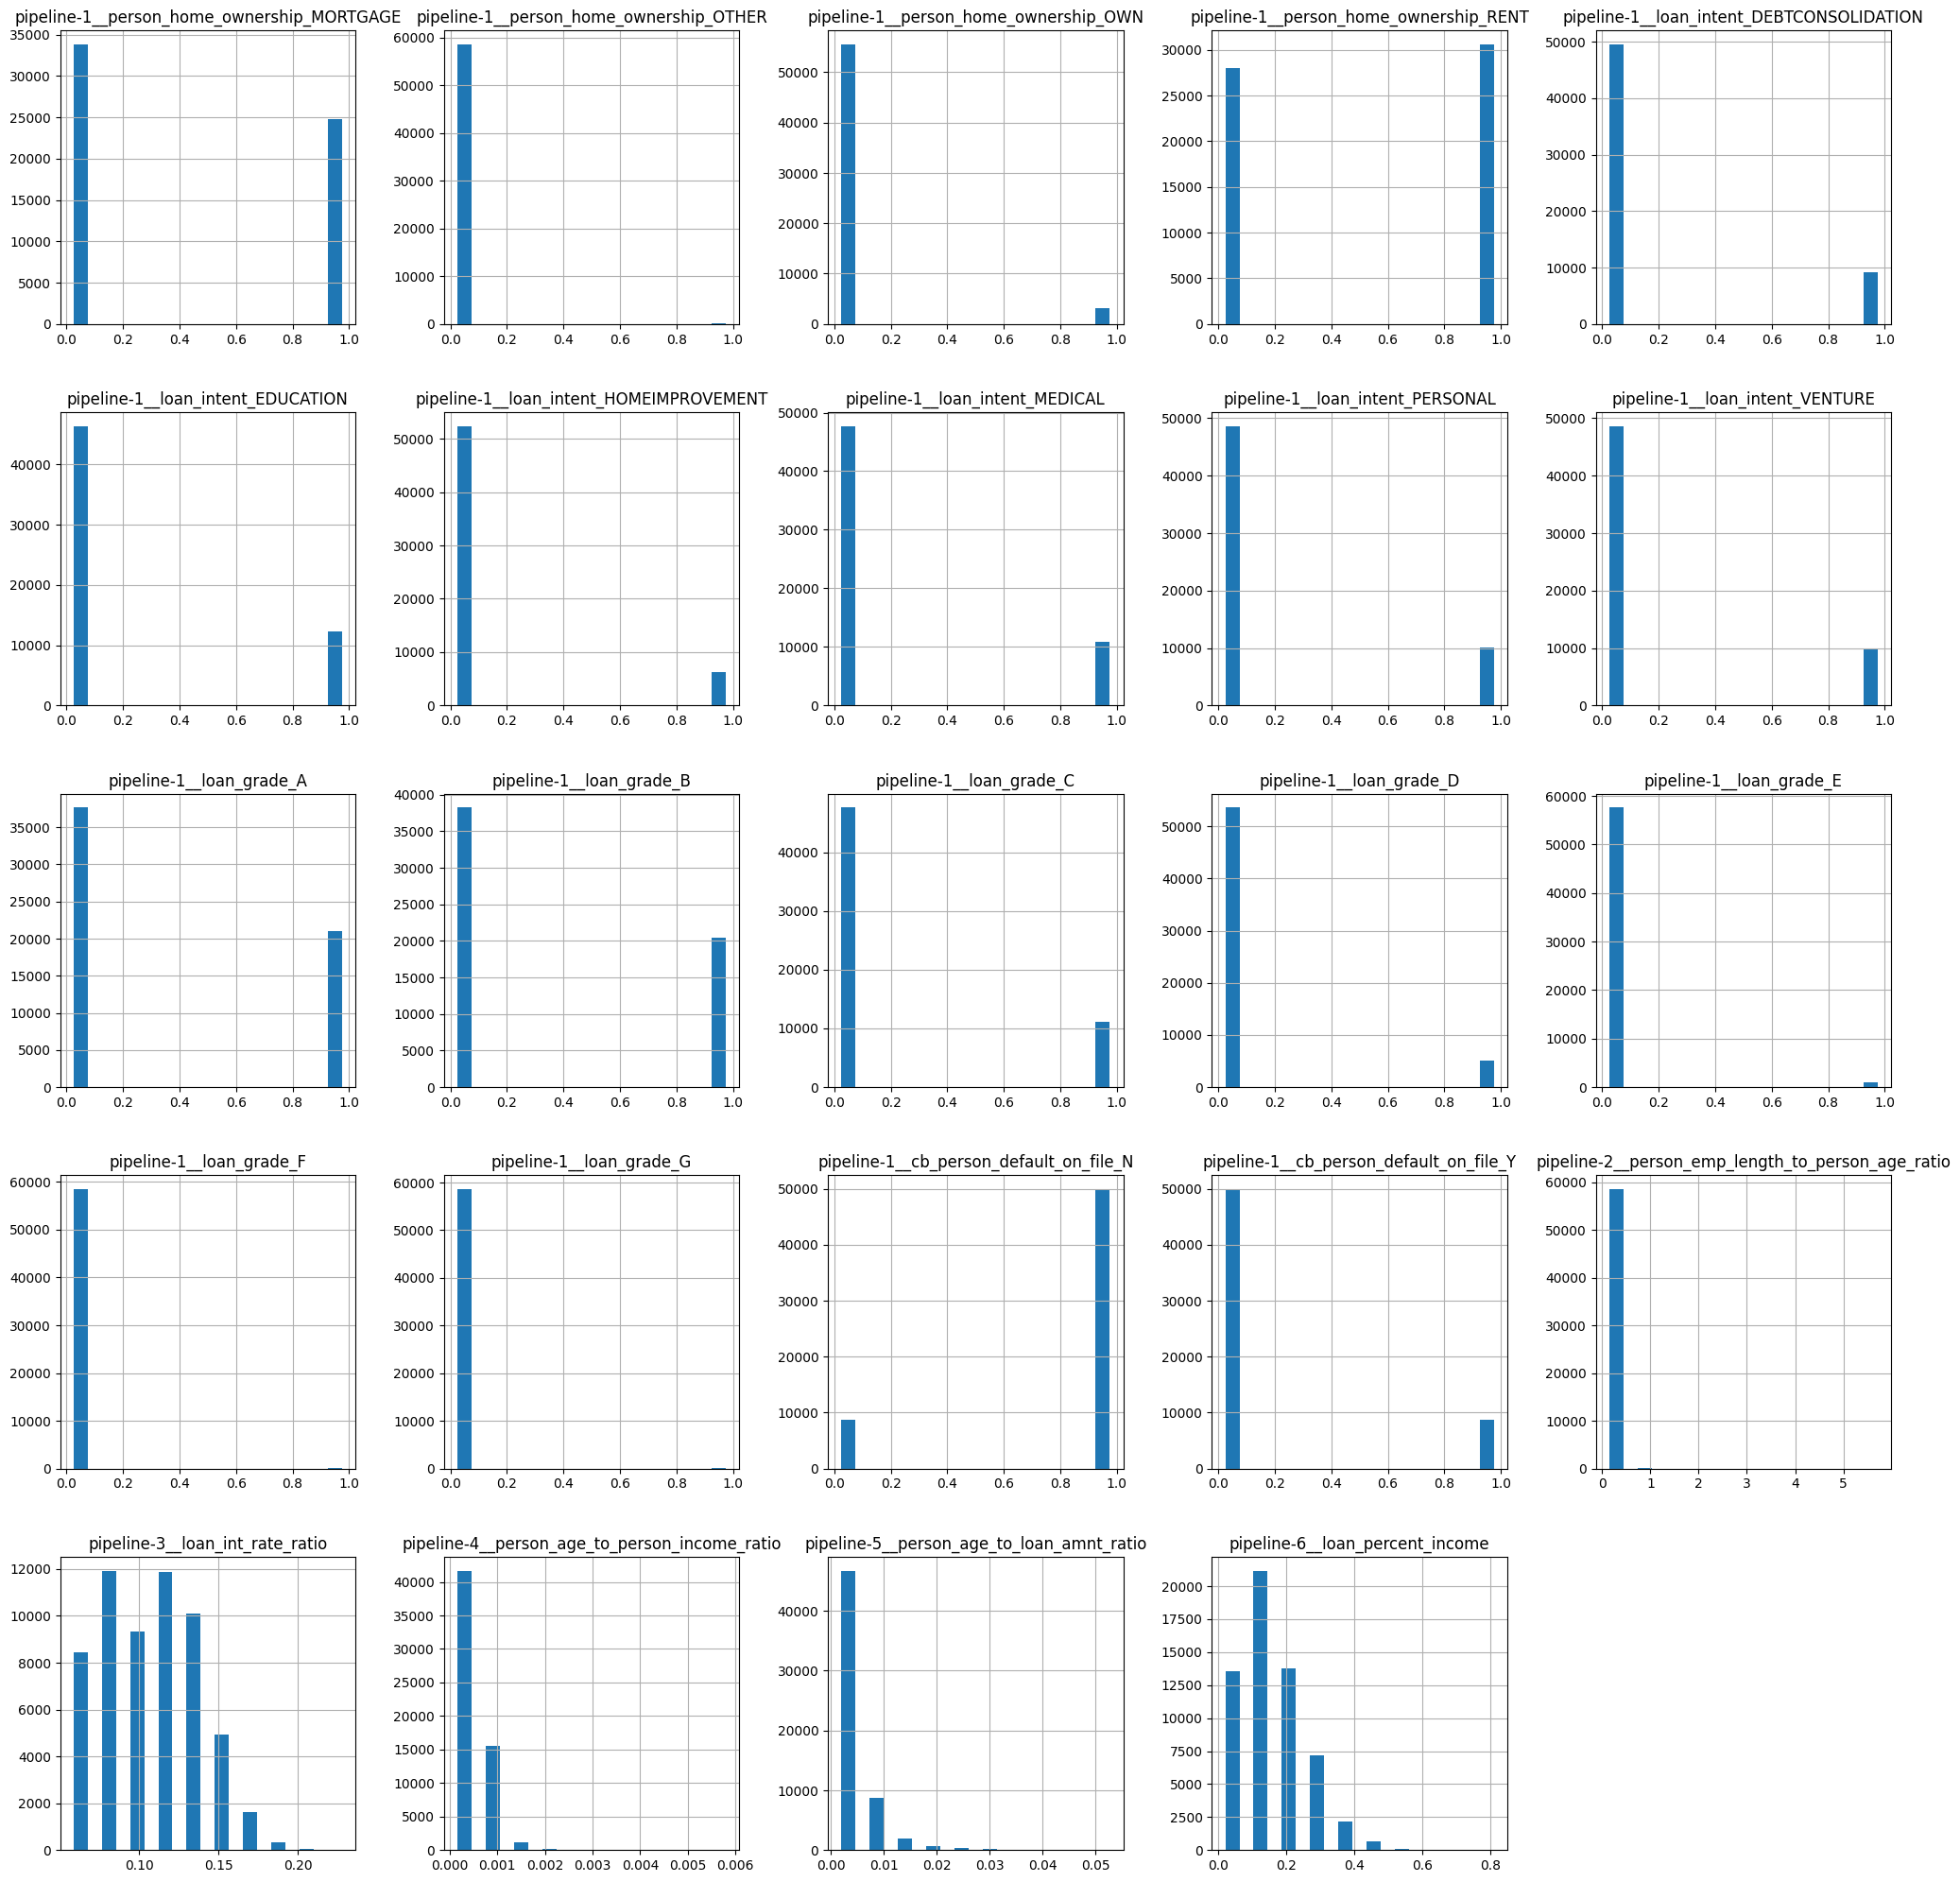

In [23]:
train.hist(bins=10,figsize=(25,25),rwidth=0.5)

<Axes: >

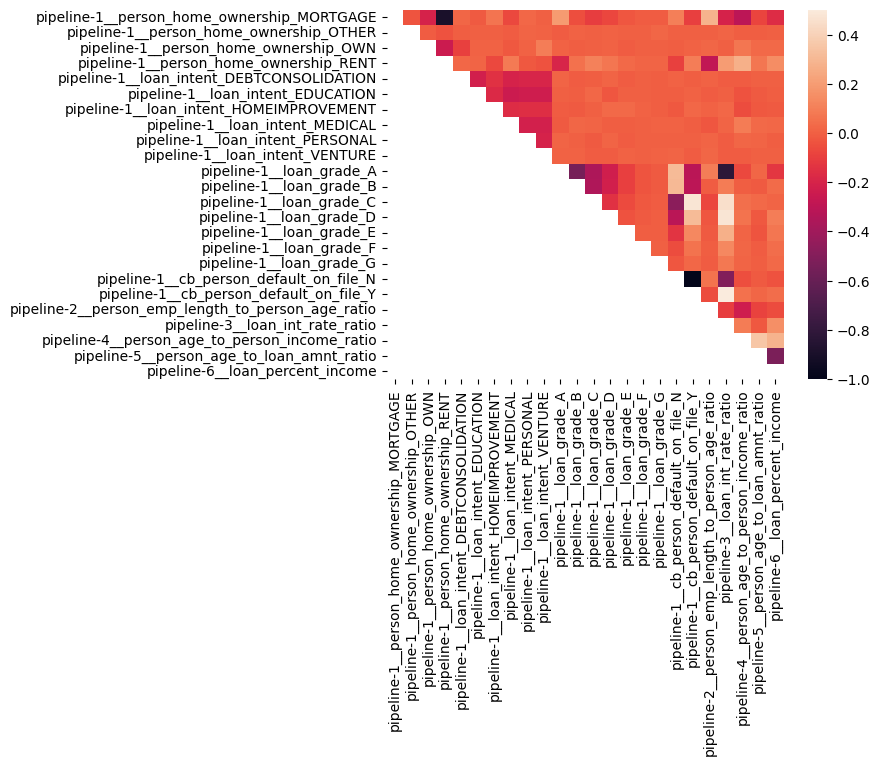

In [24]:
import seaborn as sns
corr = train.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask)

In [25]:
corr.iloc[-1].sort_values()

pipeline-5__person_age_to_loan_amnt_ratio           -0.528676
pipeline-1__person_home_ownership_MORTGAGE          -0.161793
pipeline-1__loan_grade_A                            -0.129717
pipeline-2__person_emp_length_to_person_age_ratio   -0.060073
pipeline-1__cb_person_default_on_file_N             -0.042979
pipeline-1__loan_intent_HOMEIMPROVEMENT             -0.020208
pipeline-1__loan_intent_EDUCATION                   -0.003013
pipeline-1__loan_intent_PERSONAL                    -0.002833
pipeline-1__loan_intent_DEBTCONSOLIDATION           -0.001829
pipeline-1__loan_intent_VENTURE                      0.000417
pipeline-1__person_home_ownership_OTHER              0.002283
pipeline-1__loan_grade_C                             0.014581
pipeline-1__loan_intent_MEDICAL                      0.023229
pipeline-1__loan_grade_G                             0.027566
pipeline-1__person_home_ownership_OWN                0.030305
pipeline-1__loan_grade_B                             0.036974
pipeline

In [26]:
# corr[(corr['pipeline-6__loan_status'] > 0.1) | (corr['pipeline-6__loan_status'] < -0.1)]['pipeline-6__loan_status'].sort_values()


# Training and Test Data

In [27]:
trainSet.sample(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
9928,9928,29,55000,RENT,3.0,EDUCATION,B,4000,10.74,0.07,N,6,0
47361,47361,39,50000,MORTGAGE,1.0,HOMEIMPROVEMENT,A,10000,5.42,0.20,N,14,0
46297,46297,37,70000,RENT,11.0,HOMEIMPROVEMENT,A,2875,6.54,0.04,N,12,0
14,14,27,100000,RENT,1.0,HOMEIMPROVEMENT,C,5000,13.57,0.05,Y,7,0
40021,40021,30,50000,MORTGAGE,14.0,HOMEIMPROVEMENT,A,12600,5.42,0.25,N,6,0
41296,41296,22,42000,RENT,1.0,DEBTCONSOLIDATION,B,3000,11.11,0.07,N,2,0
42043,42043,25,78000,RENT,2.0,HOMEIMPROVEMENT,F,20000,15.76,0.25,Y,3,1
40017,40017,22,55000,MORTGAGE,6.0,EDUCATION,E,8000,16.95,0.15,Y,3,0
42184,42184,24,62100,RENT,4.0,MEDICAL,B,1800,11.71,0.03,N,3,0
23765,23765,25,28000,RENT,1.0,HOMEIMPROVEMENT,C,7000,12.29,0.25,Y,4,1


In [28]:
X = train
y=trainSet[config.column_target]

# Model Selection

In [29]:
from sklearn.model_selection import cross_val_predict, cross_val_score

## Random Forest Classification

In [30]:
from sklearn.ensemble import (RandomForestClassifier
    ,GradientBoostingClassifier
    ,HistGradientBoostingClassifier)

In [31]:
forest_clf = RandomForestClassifier(random_state=42)

In [32]:
from scripts.ClassifierProcessing import ClassifierProcessing

In [33]:
forest_clf_processing=ClassifierProcessing(clf=forest_clf,name='Random Forest',num_folds=config.cross_validation_folds, method='predict_proba')

In [34]:
forest_clf_processing.process(X,y)

In [35]:
config.classifiers.append(forest_clf_processing)

## Gradient Boosting Classification

In [36]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)

In [37]:
gb_clf_processing=ClassifierProcessing(clf=gb_clf,name='Gradient Boosting',num_folds=config.cross_validation_folds, method='decision_function')

In [38]:
gb_clf_processing.process(X,y)

In [39]:
config.classifiers.append(gb_clf_processing)

## Histogram Gradient Boosting Classifier

In [40]:
hgb_clf = HistGradientBoostingClassifier()

In [41]:
hgb_clf_processing=ClassifierProcessing(clf=hgb_clf
                                        , name='Histogram Gradient Boosting'
                                        , num_folds=config.cross_validation_folds
                                        , method='decision_function')

In [42]:
hgb_clf_processing.process(X,y)

In [43]:
config.classifiers.append(hgb_clf_processing)

## Decision Tree

In [44]:
from sklearn import tree

In [45]:
dt_clf = tree.DecisionTreeClassifier()

In [46]:
dt_clf_processing=ClassifierProcessing(clf=dt_clf
                                        , name='Decision Tree'
                                        , num_folds=config.cross_validation_folds
                                        , method='predict_proba')

In [47]:
dt_clf_processing.process(X,y)

In [48]:
config.classifiers.append(dt_clf_processing)

## SGD Classification

In [49]:
from sklearn.linear_model import SGDClassifier

In [50]:
sgd_clf = SGDClassifier()

In [51]:
sgd_clf_processing=ClassifierProcessing(clf=sgd_clf
                                        , name='Stocastic Gradient Descent'
                                        , num_folds=config.cross_validation_folds
                                        , method='decision_function')

In [52]:
sgd_clf_processing.process(X,y)

In [53]:
config.classifiers.append(sgd_clf_processing)

## Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gnb_clf = GaussianNB()

In [56]:
gnb_clf_processing=ClassifierProcessing(clf=gnb_clf
                                        , name='Gaussian Naive Bayes'
                                        , num_folds=config.cross_validation_folds
                                        , method='predict_proba')

In [57]:
gnb_clf_processing.process(X,y)

In [58]:
config.classifiers.append(gnb_clf_processing)

## Measuring model performance

### Accuracy, Precision, Recall & F1

#### Accuracy

In [59]:
from scripts.Report import Report

In [60]:
report = Report(config.classifiers, num_folds=config.cross_validation_folds)
report.compare_accuracy()

,name,accuracy_iteration_1,accuracy_iteration_2,accuracy_iteration_3
0,Random Forest,0.9457261240984194,0.9465930018416207,0.9494065889093514
1,Gradient Boosting,0.9397923167425444,0.9384591774094536,0.9425516676897893
2,Histogram Gradient Boosting,0.9465445802854366,0.9467464702271332,0.9504297114794352
3,Decision Tree,0.9018875645813085,0.9019337016574586,0.9057704112952731
4,Stocastic Gradient Descent,0.8977952836462223,0.8941579701248209,0.9030591364845508
5,Gaussian Naive Bayes,0.8635224308148755,0.8662267239615306,0.8681195007161858


#### Precision

In [61]:
report.compare_precision()

,name,precision_iteration_1,precision_iteration_2,precision_iteration_3
0,Random Forest,0.9123982766874102,0.9107227208313652,0.9152777777777777
1,Gradient Boosting,0.8561310314298363,0.844880174291939,0.8590517241379311
2,Histogram Gradient Boosting,0.922740524781341,0.9156684235745088,0.9279661016949152
3,Decision Tree,0.647955647955648,0.6525189786059351,0.6690846286701209
4,Stocastic Gradient Descent,0.7520547945205479,0.7374866879659212,0.7111895161290323
5,Gaussian Naive Bayes,0.5198358413132695,0.5290255701451279,0.5347575449304849


#### Recall

In [62]:
report.compare_recall()

,name,recall_iteration_1,recall_iteration_2,recall_iteration_3
0,Random Forest,0.6846264367816092,0.6927775781530722,0.7103844771828961
1,Gradient Boosting,0.694683908045977,0.6960114983830399,0.7161336687028387
2,Histogram Gradient Boosting,0.6813936781609196,0.6855910887531441,0.7067912324829321
3,Decision Tree,0.6821120689655172,0.6758893280632411,0.6981674452030183
4,Stocastic Gradient Descent,0.4364224137931034,0.479698167445203,0.48580668343514194
5,Gaussian Naive Bayes,0.5459770114942529,0.5501257635644987,0.5666546891843335


#### F1

In [63]:
report.compare_f1()

,name,f1_iteration_1,f1_iteration_2,f1_iteration_3
0,Random Forest,0.6846264367816092,0.6927775781530722,0.7103844771828961
1,Gradient Boosting,0.694683908045977,0.6960114983830399,0.7161336687028387
2,Histogram Gradient Boosting,0.6813936781609196,0.6855910887531441,0.7067912324829321
3,Decision Tree,0.6821120689655172,0.6758893280632411,0.6981674452030183
4,Stocastic Gradient Descent,0.4364224137931034,0.479698167445203,0.48580668343514194
5,Gaussian Naive Bayes,0.5459770114942529,0.5501257635644987,0.5666546891843335


### Precision Recall Curve

In [64]:
import matplotlib.pyplot as plt

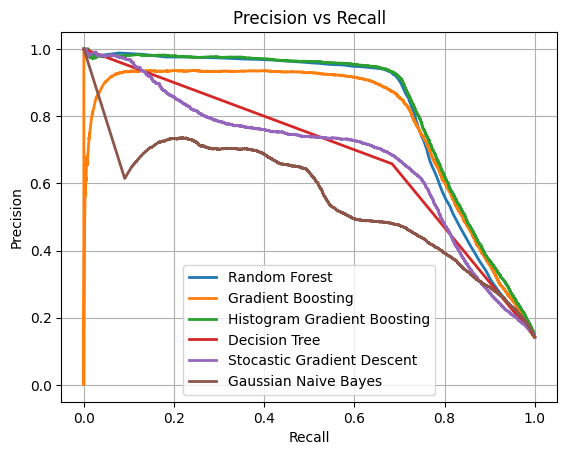

In [65]:
for clf in config.classifiers:
    plt.plot(clf.clf_recall, clf.clf_precision, linewidth=2, label=clf.name)

plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.legend()
plt.show()

### Precision, Recall vs Threshold curve

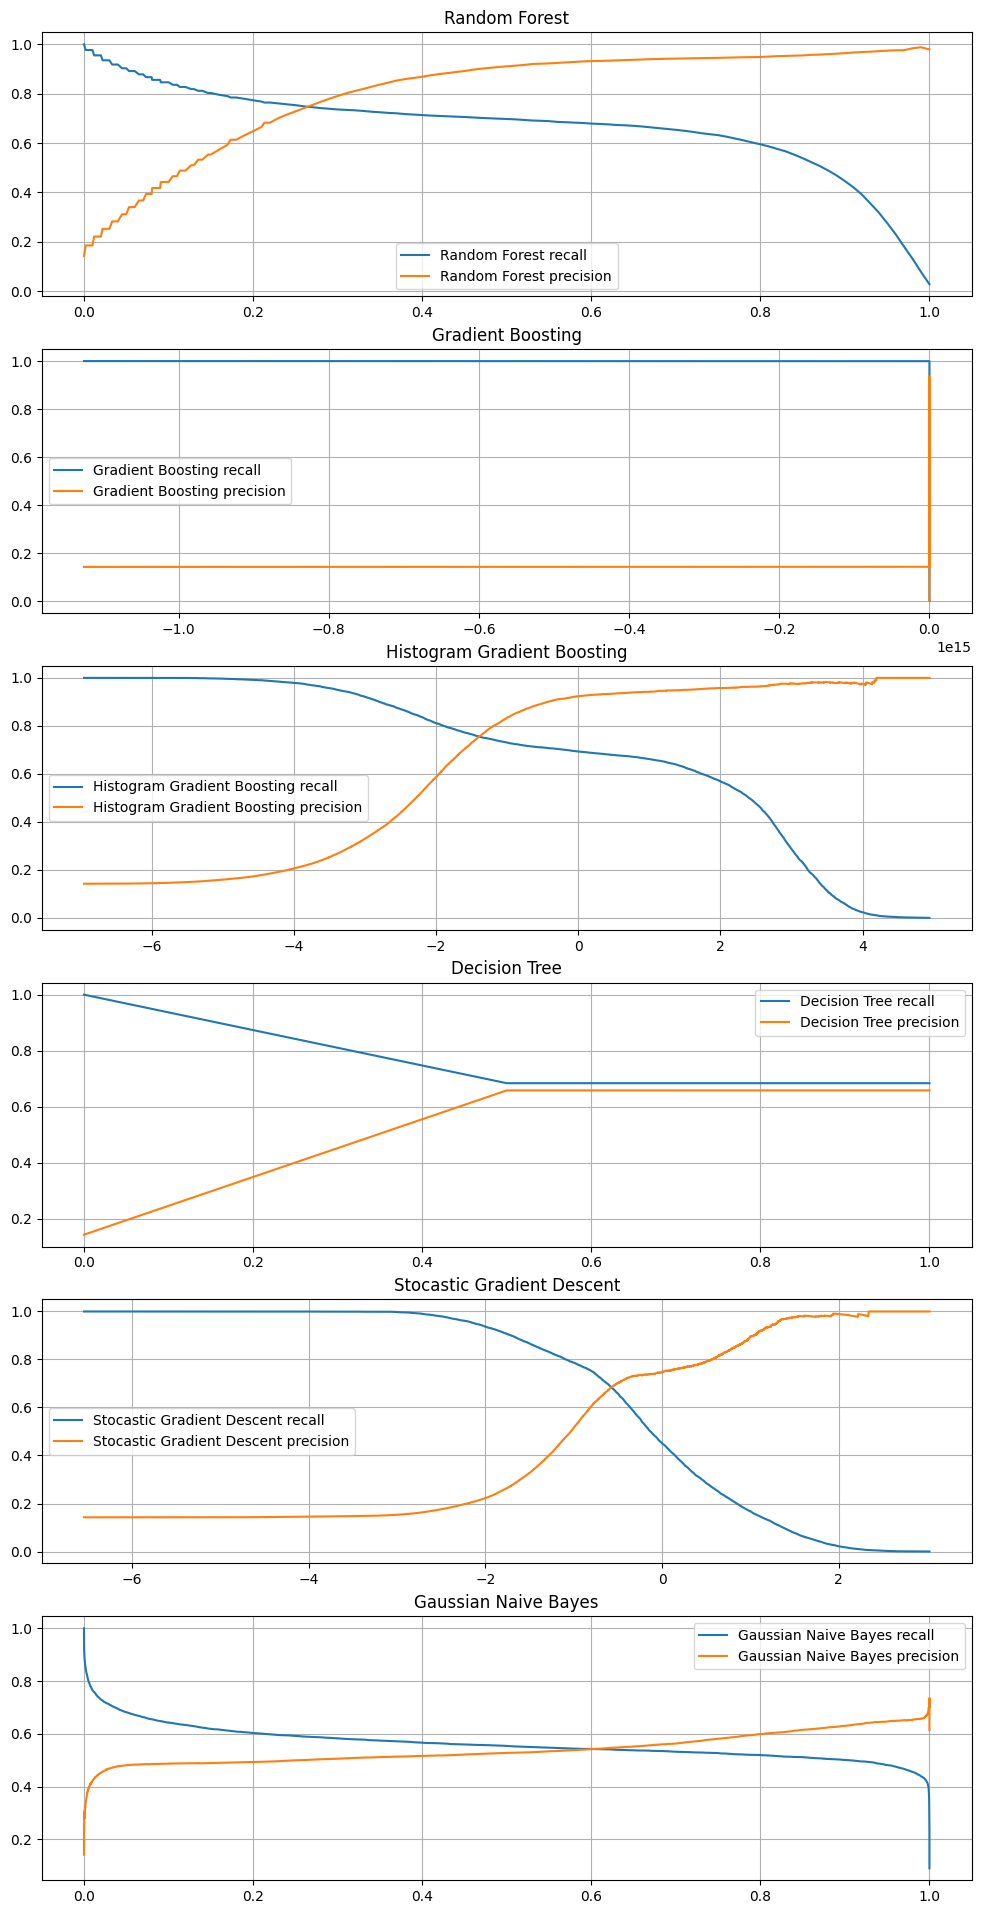

In [66]:
len_classifiers = len(config.classifiers)
fig, axs = plt.subplots(len_classifiers,figsize=(12, 24))
for idx in range(0, len_classifiers):
    clf = config.classifiers[idx]
    axs[idx].plot(clf.clf_thresholds, clf.clf_recall[:-1],'-', label=f'{clf.name} recall')
    axs[idx].plot(clf.clf_thresholds, clf.clf_precision[:-1],'-',label=f'{clf.name} precision')
    axs[idx].set_title(clf.name)
    axs[idx].grid()
    axs[idx].legend()

plt.show()

### ROC Curve

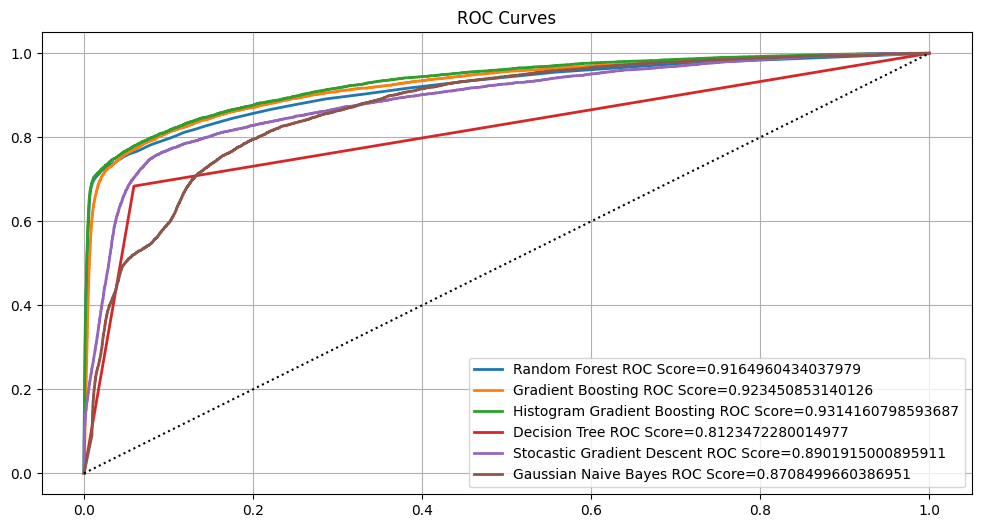

In [67]:
plt.figure(figsize=(12,6))
for idx in range(0, len_classifiers):
    clf = config.classifiers[idx]
    plt.plot(clf.roc_fpr, clf.roc_tpr, linewidth=2, label=f'{clf.name} ROC Score={clf.roc_score}') 

plt.plot([0,1],[0,1],'k:')
plt.title('ROC Curves')
plt.grid()
plt.legend()

plt.show()

# Model Building

Selecting Histogram Gradient Boosting Classifier as it had better metrics amongst all the other models

In [68]:
model = make_pipeline(preProcessingTransformer, HistGradientBoostingClassifier())

In [69]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029E78D57830>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_column_name at 0x0000029E...
                                                                                       func=<function ratio at 0x0000029E78FEC220>))]),
                                                  ['person_age', 'loan_amnt']),
                                                 ('pipeline-6',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function array_transformer_column_names at 0x0000029E78FEC860>,
                                                                                       func=<function array_transformer at 0x0000029E78FEC7C0>))]),
                                                  ['loan_percent_income'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

In [70]:
model.named_steps

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029E78D57830>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('functiontransformer',
                                                   FunctionTransformer(feature_names_out=<function ratio_column_name at 0x0000029E78FEC400>,
                                                                       func=<function ratio at 0x0000...
                                                   FunctionTransformer(feature_names_out=<function ratio_column_name at 0x0000029E78FEC400>,
                                                                       func=<function ratio at 0x0000029E78FEC220>))]),
                                  ['per

# Model Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = [
    {
        'histgradientboostingclassifier__learning_rate': [0.1,0.2,0.5]
        ,'histgradientboostingclassifier__max_iter': [10,50,100]
    }
]

In [73]:
grid_search = GridSearchCV(model,param_grid,cv=config.cross_validation_folds,scoring='roc_auc')

In [74]:
X_model_train = trainSet[config.columns_considered]
y_model_train = trainSet[config.column_target]

In [75]:
X_model_train.columns

Index(['person_age', 'person_home_ownership', 'loan_grade',
       'cb_person_default_on_file', 'person_emp_length', 'person_income',
       'loan_int_rate', 'loan_percent_income', 'loan_amnt'],
      dtype='object')

In [77]:
gridSearchResults = grid_search.fit(X_model_train, y_model_train)

In [78]:
results = pd.DataFrame(gridSearchResults.cv_results_)

In [79]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_histgradientboostingclassifier__learning_rate,param_histgradientboostingclassifier__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.124809,0.000519,0.025857,0.001011,0.1,10,{'histgradientboostingclassifier__learning_rat...,0.911900,0.912439,0.921300,0.915213,0.004310,8
1,0.306462,0.009186,0.041181,0.000252,0.1,50,{'histgradientboostingclassifier__learning_rat...,0.918769,0.917862,0.927839,0.921490,0.004505,2
2,0.371698,0.016728,0.046345,0.002878,0.1,100,{'histgradientboostingclassifier__learning_rat...,0.920349,0.918025,0.927771,0.922049,0.004156,1
3,0.132200,0.004754,0.025788,0.001613,0.2,10,{'histgradientboostingclassifier__learning_rat...,0.914924,0.915040,0.924198,0.918054,0.004345,6
4,0.235458,0.040110,0.034841,0.001317,0.2,50,{'histgradientboostingclassifier__learning_rat...,0.919486,0.917365,0.926958,0.921270,0.004114,3
5,0.269369,0.056892,0.037175,0.003467,0.2,100,{'histgradientboostingclassifier__learning_rat...,0.919029,0.915433,0.926212,0.920225,0.004481,4
6,0.116300,0.006684,0.025721,0.000894,0.5,10,{'histgradientboostingclassifier__learning_rat...,0.917437,0.915127,0.924488,0.919017,0.003981,5
7,0.140950,0.001934,0.027116,0.001493,0.5,50,{'histgradientboostingclassifier__learning_rat...,0.914745,0.911397,0.918787,0.914976,0.003021,9
8,0.144015,0.004231,0.027332,0.000462,0.5,100,{'histgradientboostingclassifier__learning_rat...,0.915366,0.912290,0.921185,0.916280,0.003689,7


In [82]:
gridSearchResults.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029E0198D820>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_column_name at 0x0000029E...
                                                                                       func=<function ratio at 0x0000029E78FEC220>))]),
                                                  ['person_age', 'loan_amnt']),
                                                 ('pipeline-6',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function array_transformer_column_names at 0x0000029E78FEC860>,
                                                                                       func=<function array_transformer at 0x0000029E78FEC7C0>))]),
                                                  ['loan_percent_income'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

In [83]:
gridSearchResults.best_params_

{'histgradientboostingclassifier__learning_rate': 0.1,
 'histgradientboostingclassifier__max_iter': 100}

# Model Evaluation